In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys

print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("../")
print("at directory:", os.getcwd())

at directory: /Users/wilka/git/research/human-dyna-web/figures
changing to root directory
at directory: /Users/wilka/git/research/human-dyna-web


In [5]:
sys.path.append("simulations")

In [6]:
import polars as pl
import jax

from analysis import housemaze_model_data
from analysis import housemaze_user_data

from analysis import housemaze_utils
from analysis import experiment_analysis
from analysis import housemaze_analysis
from nicewebrl import dataframe

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl


In [7]:
from glob import glob
import configs

# ON COMPUTER
RESULTS_DIR = "/Users/wilka/git/research/"
USER_RESULTS_DIR = os.path.join(configs.JAXMAZE_USER_DIR, "user_data/exps")

human_data_pattern = "final*v2*"

files = f"{USER_RESULTS_DIR}/*{human_data_pattern}*.json"
# files = 'jaxemaze_data/*.json'
print(files)
valid_files = list(set(glob(files)))
len(valid_files)

/Users/wilka/git/research/preplay_results/jaxmaze_user_data/user_data/exps/*final*v2**.json


400

In [8]:
user_df = housemaze_user_data.get_human_data(
  valid_files,
  overwrite_episode_data=False,
  overwrite_episode_info=False,
  require_finished=False,
  load_df_only=False,
  debug=False,
)

/Users/wilka/miniforge3/envs/preplay/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

  pid = os.fork()
Failed to unpack record in /Users/wilka/git/research/preplay_results/jaxmaze_user_data/user_data/exps/user=4238060579_name=jaxmaze_final-v2-r1-t0-start_debug=0.json: unpack(b) received extra data.


Combining results:   0%|          | 0/400 [00:00<?, ?it/s]

In [9]:
new = user_df.filter(eval=True, manipulation=4).sort("max_log_rt", descending=True)
for i in range(1):
  housemaze_utils.create_episode_reaction_times_video(new.episodes[i])
new.head()

index,maze,condition,name,block,manipulation,global_episode_idx,episode_idx,eval,task,room,start_pos,user_id,age,sex,worker_id,hit_id,assignment_id,git_version,user,debug,exp_name,tell_reuse,reversal,optimal_length,success,path_length,termination,first_log_rt,first_rt,avg_log_rt,avg_rt,total_log_rt,total_rt,log_avg_post_rt,avg_post_rt,max_log_rt,max_rt,log_max_post_rt,log_max_init_post_rt,log_max_end_rt,log_max_final_rt,optimal_length_deviance,reuse
u32,str,i64,str,str,i64,i64,i64,bool,i64,i64,str,i64,str,str,str,str,str,str,i64,i64,str,i64,str,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
0,"""big_m3_maze1_(T,T)""",1,"""big_m3_maze1_eval__(T,T)_train""","""reusing longer of two paths wh…",3,69,1,true,29,0,"""[ 0 24]""",2950231885,"""51""","""Female""","""A1G58M5YLPBZPD""","""31ANT7FQN8OJYEBE2RCDNWOV1QSH51""","""36ZN444YTSK7O3QA4QVZLXLVW3IION""","""git_version_unknown""",2950231885,0,"""jaxmaze""",1,"""T,T""",68,1.0,77,1.0,7.340187,1.541,5.770073,1.052597,444.29562,81.050003,5.7494135,1.046171,10.888427,53.553001,10.888427,7.870166,6.3279366,10.888427,9,"""0"""
1,"""big_m3_maze1_(F,F)""",1,"""big_m3_maze1_eval__(F,F)_train""","""reusing longer of two paths wh…",3,50,1,true,13,0,"""[17 1]""",3379749636,"""37""","""Male""","""A15Y215D57OSO5""","""3KVQ0UJWPX71V463XQYDOZYIGE4W5F""","""37W3JXSD67U1JCEHZU8COFS5PMUYWW""","""git_version_unknown""",3379749636,0,"""jaxmaze""",1,"""F,F""",68,1.0,77,1.0,10.203852,27.007,5.256016,0.553519,404.71323,42.620991,5.1909127,0.205447,10.203852,27.007,7.20934,7.20934,5.8021183,5.8021183,9,"""0"""
2,"""big_m3_maze1_(F,T)""",1,"""big_m3_maze1_eval__(F,T)_train""","""reusing longer of two paths wh…",3,16,1,true,29,0,"""[0 1]""",2665891055,"""49""","""Male""","""A15GIMCVZLJUQ9""","""3WGCNLZJKFU3YG5TF8RBTLWGXHKD1U""","""3OSWBBLG1FJDA1OGD3HKDDWAFYZDXU""","""git_version_unknown""",2665891055,0,"""jaxmaze""",1,"""F,T""",68,0.0,80,1.0,7.8001633,2.441,6.1984224,0.78215,495.87378,62.571995,6.1781473,0.761152,9.949178,20.934999,9.949178,6.989335,6.7117405,9.949178,12,"""1"""
3,"""big_m3_maze1_(F,T)""",1,"""big_m3_maze1_eval__(F,T)_train""","""reusing longer of two paths wh…",3,68,1,true,46,0,"""[0 1]""",823289974,"""59""","""Male""","""A2TT40RROB0SCZ""","""3O2Y2UIUCQG2215BEOSJM0V0I12FKE""","""33CKWXB73K6BS5NBQHCIH2R0LVQ11R""","""git_version_unknown""",823289974,0,"""jaxmaze""",1,"""F,T""",68,1.0,83,1.0,7.4599147,1.737,6.242064,0.784,518.0913,65.071999,6.227212,0.772378,9.902537,19.981001,9.902537,9.902537,6.6618547,6.705639,15,"""1"""
4,"""big_m3_maze1_(F,T)""",1,"""big_m3_maze1_eval__(F,T)_train""","""reusing longer of two paths wh…",3,34,1,true,46,0,"""[0 1]""",386454333,"""64""","""Male""","""A2GC6RYOYAZAP7""","""3UY4PIS8QR7CKSW6425EPQ8ABMQ1N6""","""3HUTX6F6VV93DIC8FNA7YHED6GHO2T""","""git_version_unknown""",386454333,0,"""jaxmaze""",1,"""F,T""",68,0.0,80,1.0,9.81,18.215,6.204671,0.8041,496.37366,64.328003,6.159034,0.583709,9.81,18.215,8.264363,8.264363,6.985642,7.497207,12,"""1"""


No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze

In [ ]:
new = user_df.filter(eval=True, manipulation=3).sort("max_log_rt")

80


(<Figure size 500x300 with 1 Axes>,
 <Axes: title={'center': 'Reaction Times'}, xlabel='Episode timestep', ylabel='Reaction Time (s)'>)

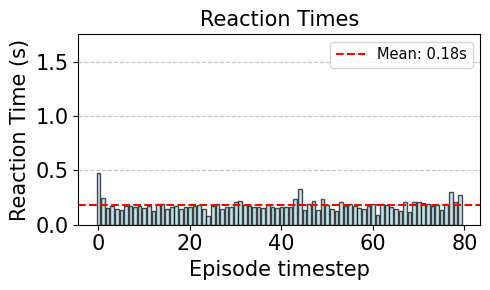

In [61]:
from analysis import housemaze_utils
from analysis import experiment_analysis

experiment_analysis.plot_reaction_times(
  new.episodes[0].reaction_times, figsize=(5, 3), ylim=[0, 1.75]
)
# for i in range(5):
#     housemaze_utils.create_episode_reaction_times_video(new.episodes[i])
# new.head()
# housemaze_utils.create_episode_reaction_times_video(new.episodes[-1])
# housemaze_utils.create_episode_reaction_times_video(new.episodes[1])

(<Figure size 900x300 with 2 Axes>,
 <Axes: title={'center': 'Reused old path'}, xlabel='Episode timestep'>)

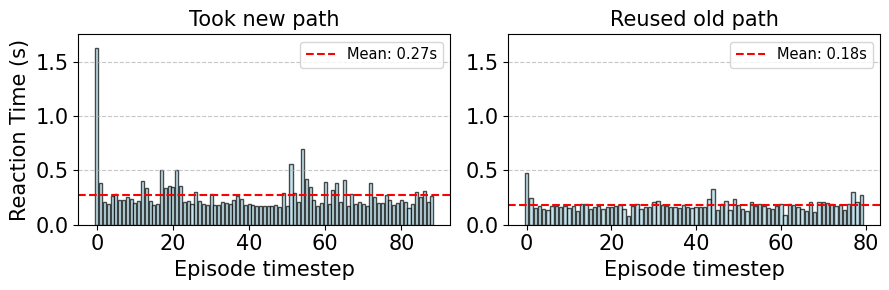

In [74]:
import matplotlib.pyplot as plt

nepisodes = len(new.episodes)
idx = nepisodes // 2 - 3
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
experiment_analysis.plot_reaction_times(
  new.episodes[idx].reaction_times, title="Took new path", ylim=[0, 1.75], ax=axs[0]
)
experiment_analysis.plot_reaction_times(
  new.episodes[0].reaction_times,
  title="Reused old path",
  ylabel=False,
  ylim=[0, 1.75],
  ax=axs[1],
)

# experiment_analysis.plot_reaction_times(new.episodes[idx].reaction_times, ylim=[0, 1.75], remove_last=False)

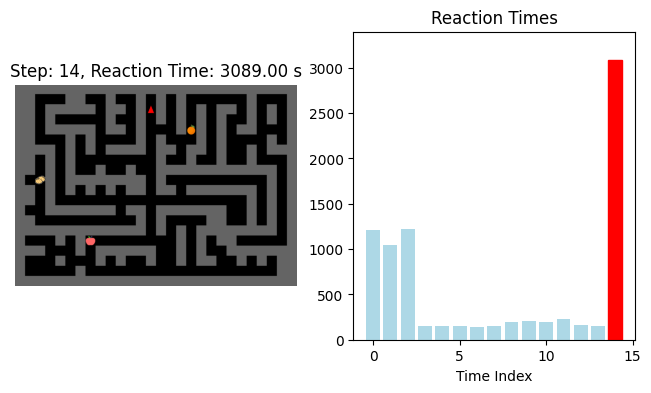

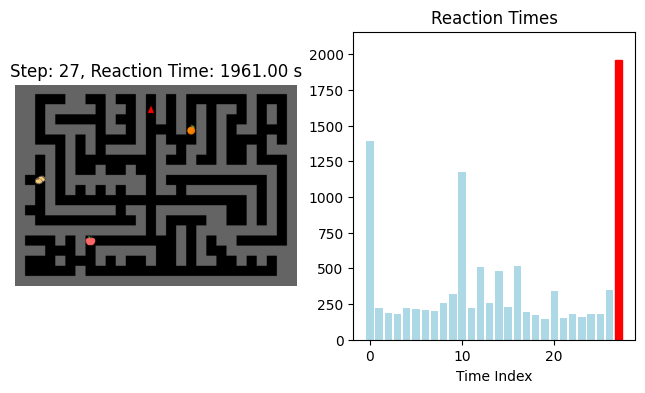

In [16]:
new = df.filter(eval=False)
housemaze_utils.create_episode_reaction_times_video(new.episodes[0])
housemaze_utils.create_episode_reaction_times_video(new.episodes[1])

In [12]:
df.filter(user=user, eval=True).head()

index,maze,condition,name,block,manipulation,global_episode_idx,episode_idx,eval,task,room,user_id,age,sex,new_path,old_path,user,exp,debug,version,tell_reuse,timer,reversal
u32,str,i64,str,str,i64,i64,i64,bool,i64,i64,i64,i64,str,bool,bool,i64,i64,i64,i64,i64,i64,str
0,"""big_m4_maze_short_eval_diff""",2,"""exp4-v1-r0-t0-plan""","""See if faster off train path t…",4,51,1,true,13,0,1364102698,56,"""Male""",null,null,1364102698,4,0,1,0,0,"""F,F"""
1,"""big_m4_maze_short_eval_same_bl…",1,"""exp4-v1-r0-t0-plan""","""See if faster off train path t…",4,67,1,true,13,1,1364102698,56,"""Male""",null,null,1364102698,4,0,1,0,0,"""T,F"""
2,"""big_m4_maze_short_eval_same_bl…",1,"""exp4-v1-r0-t0-plan""","""See if faster off train path t…",4,96,1,true,46,1,1364102698,56,"""Male""",null,null,1364102698,4,0,1,0,0,"""T,T"""
3,"""big_m4_maze_short_eval_diff""",2,"""exp4-v1-r0-t0-plan""","""See if faster off train path t…",4,97,1,true,29,0,1364102698,56,"""Male""",null,null,1364102698,4,0,1,0,0,"""T,T"""
4,"""big_m4_maze_long_eval_same_bli…",1,"""exp4-v1-r0-t0-plan""","""See if faster off train path t…",4,149,1,true,29,0,1364102698,56,"""Male""",null,null,1364102698,4,0,1,0,0,"""F,F"""


No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Filtered 47 data points
Filtered 52 data points
Filtered 54 data points
Filtered 60 data points
Filtered 52 data points
Filtered 46 data points
Filtered 41 data points
Filtered 66 data points
Filtered 46 data points
Filtered 46 data points
Filtered 47 data points
Filtered 47 data points
Filtered 60 data points
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Filtered 46 data points
Filtered 135 data points
Filtered 89 data points
Filtered 56 data points
Filtered 47 data points
Filtered 47 data points
Filtered 53 data points
Filtered 62 data points
Filtered 57 data points
Filtered 23 data points
Filtered 55 data points
Filtered 53 data points
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Filtered 32 data p